<a href="https://colab.research.google.com/github/Katyayni-10/Image_Recognition/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving mnist-dataset[2] to mnist-dataset[2]


{'mnist-dataset[2]': b'\r\n\r\n<!DOCTYPE html>\r\n<html lang="en">\r\n\r\n<head>\r\n  <title>MNIST  Dataset | Kaggle</title>\r\n  <meta charset="utf-8" />\r\n    <meta name="robots" content="index, follow" />\r\n  <meta name="description" content="The MNIST database of handwritten digits (http://yann.lecun.com)" />\r\n    <meta name="keywords" content="computer science,image,multiclass classification" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0">\r\n  <meta name="theme-color" content="#008ABC" />\r\n  <script nonce="GH2b&#x2B;CtljKO7tn73GcgnTg==" type="text/javascript">\r\n    window["pageRequestStartTime"] = 1754830668526;\r\n    window["pageRequestEndTime"] = 1754830668617;\r\n    window["initialPageLoadStartTime"] = new Date().getTime();\r\n  </script>\r\n  <script nonce="GH2b&#x2B;CtljKO7tn73GcgnTg==" id="gsi-client" src="https://accounts.google.com/gsi/client" async defer></script>\r\n  <script nonce="GH2b&#x

In [21]:
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [22]:
!cp kaggle.json ~/.kaggle/

In [23]:
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [25]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape} Test shape: {x_test.shape}")

Train shape: (60000, 28, 28) Test shape: (10000, 28, 28)


In [26]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


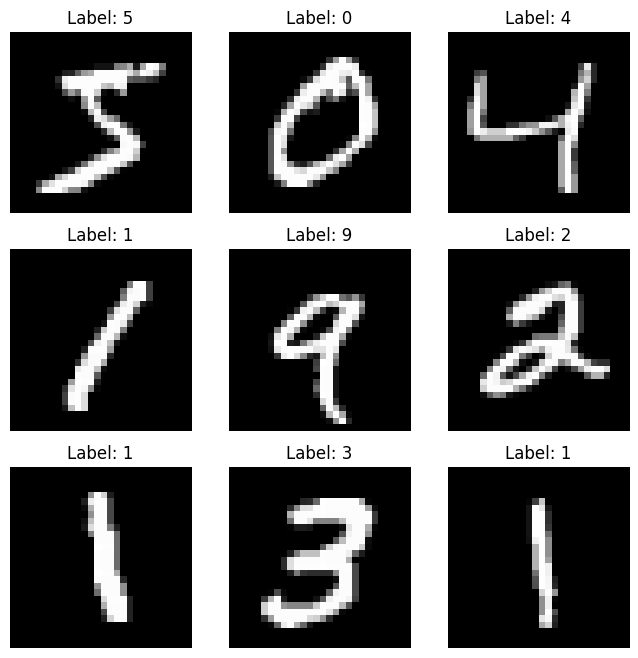

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [28]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape:{x_train_c10.shape}")

CIFAR-10 train shape:(50000, 32, 32, 3)


**DAY 2**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8899 - loss: 0.3560 - val_accuracy: 0.9818 - val_loss: 0.0612
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9862 - val_loss: 0.0446
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9906 - loss: 0.0310 - val_accuracy: 0.9866 - val_loss: 0.0418
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9930 - loss: 0.0199 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9948 - loss: 0.0144 - val_accuracy: 0.9889 - val_loss: 0.0386


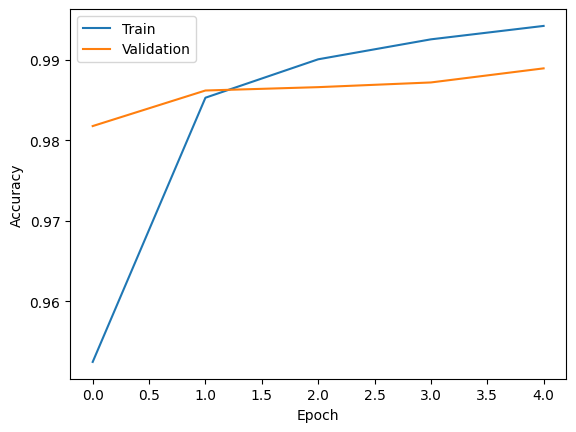

In [13]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test accuracy: {test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9862 - loss: 0.0430
Test accuracy: {test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train_c10)

In [17]:

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10, validation_data=(x_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 77ms/step - accuracy: 0.3458 - loss: 1.7805 - val_accuracy: 0.5315 - val_loss: 1.3102
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - accuracy: 0.5236 - loss: 1.3286 - val_accuracy: 0.5371 - val_loss: 1.3659
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.5875 - loss: 1.1768 - val_accuracy: 0.5876 - val_loss: 1.1618
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6164 - loss: 1.0990 - val_accuracy: 0.6525 - val_loss: 0.9748
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6410 - loss: 1.0333 - val_accuracy: 0.6524 - val_loss: 1.0024
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 75ms/step - accuracy: 0.6514 - loss: 1.0037 - val_accuracy: 0.6901 - val_loss: 0.8907
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6651 - loss: 0.9704 - val_accuracy: 0.7074 - val_loss: 0.8486
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6712 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.85      0.85      0.85      1000
           2       0.68      0.58      0.62      1000
           3       0.65      0.35      0.46      1000
           4       0.68      0.64      0.66      1000
           5       0.62      0.66      0.64      1000
           6       0.59      0.91      0.72      1000
           7       0.69      0.82      0.75      1000
           8       0.90      0.76      0.82      1000
           9       0.79      0.81      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



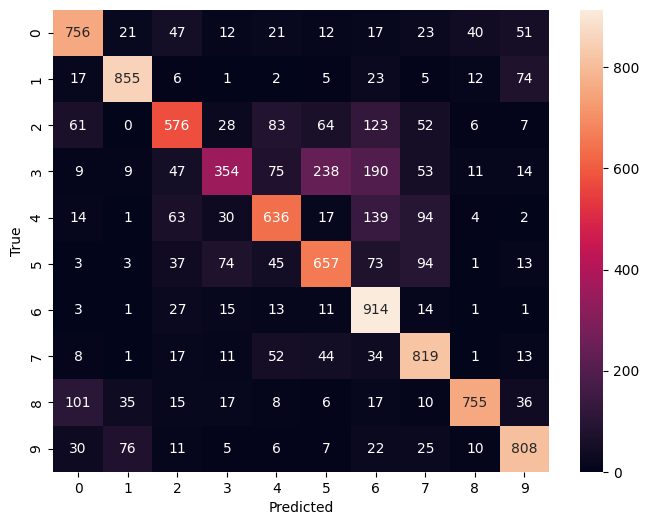

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
# Reshape y_test_c10 to be 1D
cm = confusion_matrix(y_test_c10.reshape(-1), y_pred_c10)
print(classification_report(y_test_c10.reshape(-1), y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 86% 187M/218M [00:00<00:00, 552MB/s] 
100% 218M/218M [00:00<00:00, 531MB/s]


In [31]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224, 224),batch_size=32,class_mode='binary',subset='training')
val_generator = datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224, 224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [33]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.7807 - loss: 0.5494 - val_accuracy: 0.7985 - val_loss: 0.5278
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.7997 - loss: 0.4949 - val_accuracy: 0.7985 - val_loss: 0.5126
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.8038 - loss: 0.4776 - val_accuracy: 0.7985 - val_loss: 0.5132
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.7955 - loss: 0.4783 - val_accuracy: 0.7985 - val_loss: 0.5183
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.8052 - loss: 0.4462 - val_accuracy: 0.7925 - val_loss: 0.5313


In [34]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1738s 7s/step - accuracy: 0.7948 - loss: 0.4983 - val_accuracy: 0.7910 - val_loss: 0.5338
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1706s 7s/step - accuracy: 0.8061 - loss: 0.4372 - val_accuracy: 0.7910 - val_loss: 0.5354
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1695s 7s/step - accuracy: 0.8095 - loss: 0.4181 - val_accuracy: 0.7900 - val_loss: 0.5367


In [35]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step


/tmp/ipython-input-2167634249.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


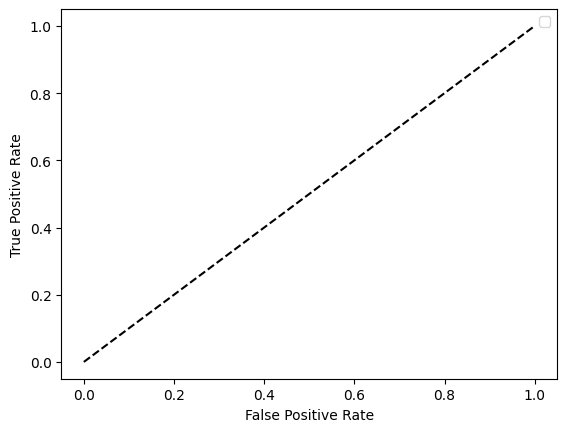

In [36]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba = loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
# plt.plot(fpr,tpr,label='AUC = {:.3f}'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
plt.legend()
plt.show()

In [39]:
from google.colab import files
uploaded = files.upload()  # Upload
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'data1.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving data1.jpg to data1 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Dog


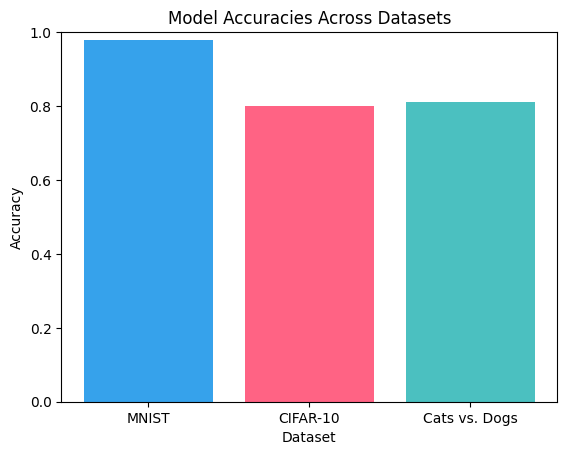

In [42]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.80, 0.81]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [41]:
model.save("mnist_model.h5")
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mnist_model.h5')